# Projeto 2 - Houses Prices

### 1. Entendendo o Problema

MNIST é um conjunto de dados com imagens de dígitos manuscritos (de 0 a 9). 

Cada imagem tem 28x28 pixels, o que significa que são representadas como matrizes de 784 valores (28 * 28). 
### objetivo: 
Treinar um modelo que, ao receber uma imagem, classifique corretamente o dígito correspondente.

### 2. Importando as Bibliotecas

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

### 3. Explorando os dados

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Formato dos dados de treino: (60000, 28, 28)
Formato dos rótulos de treino: (60000,)


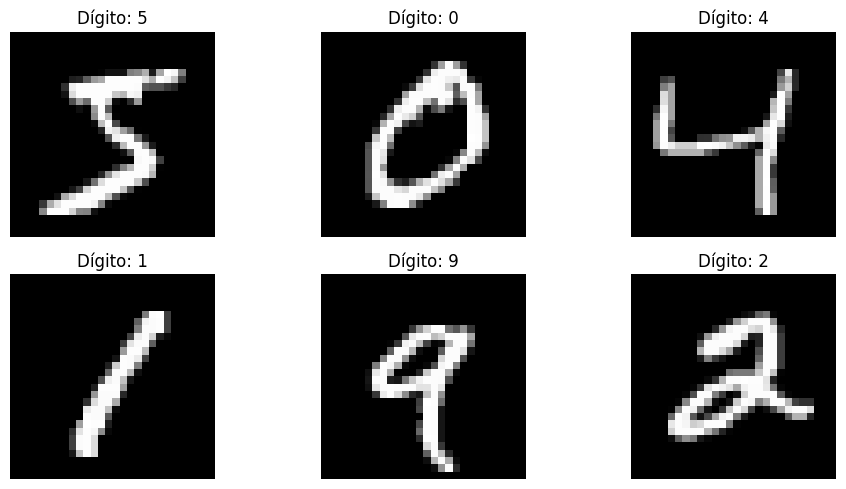

In [8]:
# Carregar o conjunto de dados MNIST
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualizar os dados
print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos rótulos de treino: {y_train.shape}")

# Exibir algumas imagens
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Dígito: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### 4.Préprocessamento

In [9]:
# Normalizar os valores dos pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Ajustar o formato para incluir o canal de cores (1 canal para grayscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding para os rótulos
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### 5.Construindo o Modelo

In [10]:
# Criando o modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Saída com 10 classes (0-9)
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\josaf\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 6.Treinando o Modelo

In [11]:
# Treinamento
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Avaliação
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy:.2f}")


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8718 - loss: 0.4247 - val_accuracy: 0.9806 - val_loss: 0.0659
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9826 - loss: 0.0560 - val_accuracy: 0.9862 - val_loss: 0.0456
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9837 - val_loss: 0.0548
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9912 - loss: 0.0286 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9886 - val_loss: 0.0368
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9878 - val_loss: 0.0437
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9953 - loss: 0.0137 - val_accuracy: 0.9901 - val_loss: 0.0422
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9969 - loss: 0.0094 - val_accuracy: 0.

### 7. Avaliando o Modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


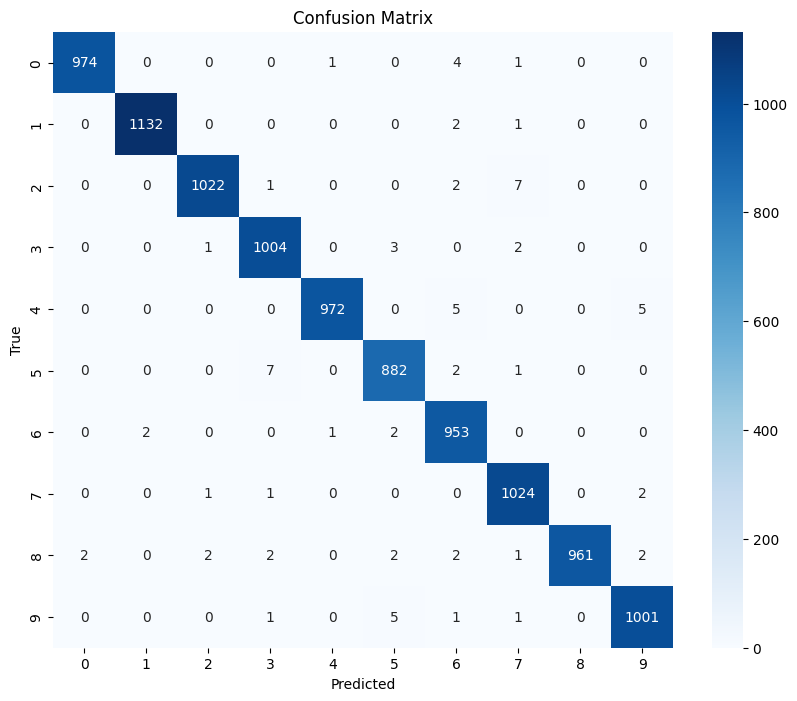

In [12]:
# Predições
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### 8. Salvando o Modelo

In [ ]:
# Salvando o modelo
model.save('mnist_classifier.h5')
print("Modelo salvo como 'mnist_classifier.h5'")


Modelo salvo como 'mnist_classifier.h5'


### 9. Testando o modelo

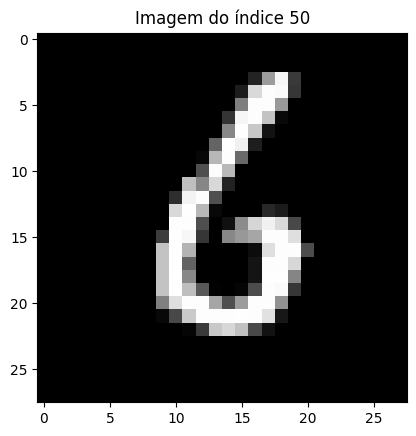

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predição: 6


In [19]:
import matplotlib.pyplot as plt

# Escolhendo uma imagem de teste, por exemplo, a primeira do conjunto X_test
img_index = 50  # Alterar o índice para testar outras imagens
img = X_test[img_index].reshape(28, 28)

# Mostrando a imagem
plt.imshow(img, cmap='gray')
plt.title(f"Imagem do índice {img_index}")
plt.show()

# Fazendo a predição
img_input = X_test[img_index].reshape(1, 28, 28, 1)
pred = model.predict(img_input)
predicted_class = np.argmax(pred)
print(f"Predição: {predicted_class}")
